In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
from math import e
%matplotlib inline

In [2]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)



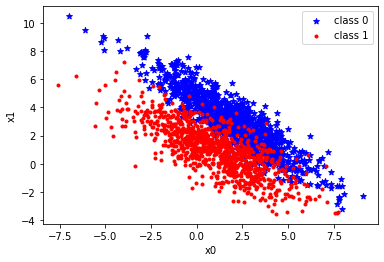

In [3]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.ones(len(r0)+len(r1))
y[:len(r0),] = 0

# Logistic Function  

$$f(x) = \frac{1}{1+e^{-x}}$$
Standard logistic function with parameters $$k = 1, x_0=0, L=1$$
Standard parameters because original function is
$$f(x)= \frac{L}{1+ e^{-k(x-x_0)}}$$
$\begin{align} x_0\end{align}$ = the $\begin{align} x\end{align}$ value of the sigmoids midpoint
$$\newline$$
$\begin{align} L\end{align}$ = the curves maximum value 
$$\newline$$
$\begin{align} k\end{align}$ = the logistic growth rate or steepness of the curve

In [4]:
def logistic_function(x):
    return (1/(1+e**(-x)))
print(logistic_function(X))

[[0.0548637  0.99967885]
 [0.90062346 0.94469385]
 [0.7083644  0.98273789]
 ...
 [0.98400919 0.03460781]
 [0.10374664 0.88991623]
 [0.93845793 0.32980538]]


(-0.1, 1.1)

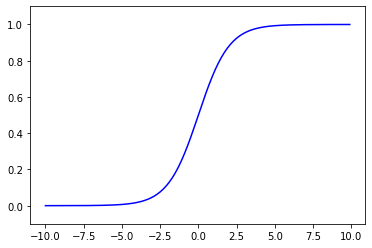

In [5]:

###Why plotting in interval of [-10, 10]?

a=np.arange(-10.,10,0.1)
plt.plot(a, logistic_function(a), 'b-')
plt.ylim(-.1, 1.1)

# Logistic Hypothesis

$\begin{align} h_\Theta(\vec x) = \sigma(\vec x'^T \cdot \vec \theta) \end{align}$ = hypothesis

In [6]:
def helper(x):
    return (np.insert(x, 0, 1, axis=1))
print(helper(X))


[[ 1.         -2.8464772   8.04329491]
 [ 1.          2.20417114  2.83797683]
 [ 1.          0.88745357  4.04182823]
 ...
 [ 1.          4.11962132 -3.32845504]
 [ 1.         -2.15627134  2.08988567]
 [ 1.          2.72451707 -0.70906544]]


In [7]:
def helper(x):
    return (np.insert(x, 0, 1, axis=1))


def logistic_hypothesis(theta):
#    return lambda x: logistic_function(theta * x)
    #return lambda x: logistic_function(theta * helper(x))
    return lambda x: logistic_function(np.sum((theta * x), axis = 1))
    #in logistic hypothesis muss die berechnung von theta mit x übergeben werden
    #function die x erweitert 
    #in jeder runde von lambda wird der jeweilige Wert vom index der thetas mit dem werten des gegenwärtigen index von x berechnet. Davon werden alle werte in jeder runde miteinander summiert.
    #return lambda x: (1/(1+e**(theta*np.insert(-x, 0, 1, axis=1))))
    ''' Combines given list argument in a logistic equation and returns it as a function
    Args:
        thetas: list of coefficients
    Returns:
        lambda that models a logistic function based on thetas and x
    '''
    raise NotImplementedError("You should implement this function")

### Uncomment to test your implementation
theta = np.array([1.1, 2.0, -.9])
h = logistic_hypothesis(theta)
print(h(helper(X)))


#print(logistic_hypothesis(theta)(helper(X)))
#here is something wrong because sigmoid is in range of 0-1

[7.26874371e-06 9.50459881e-01 3.18052054e-01 ... 9.99995604e-01
 6.09944257e-03 9.99244363e-01]



# Cross entropy costs

\begin{equation}
    \text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\vec \theta) = -y^{(i)} \cdot log(h_{\Theta} ({\vec x}^{(i)})) - (1-y^{(i)}) \cdot log(1-h_\Theta({\vec x}^{(i)}))
\end{equation}


In [8]:
import math
def cross_entropy_costs(h, X, y):
    
    X = helper(X)

    #return lambda theta: -y*np.log(h(theta)(helper(X))) - (1 - y) * np.log(1 - h(helper(X))(helper(X)))
    return lambda theta: -y * np.log(h(theta)(X)) - (1 - y) * np.log(1 - h(theta)(X))
    '''Implements cross-entropy as a function costs(theta) on given traning data 
    Args:
        h: the hypothesis as function
        x: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        
    Returns:
        lambda costs(theta) that models the cross-entropy for each x^i
    '''
    raise NotImplementedError("You should implement this function")

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
costs = cross_entropy_costs(logistic_hypothesis, X, y)
print(costs(theta))

[1.94369303e+01 1.39222737e+01 1.49003922e+01 ... 1.13423911e+00
 5.06633280e-02 1.31881164e-02]


# Loss Function

In [91]:
def mean_cross_entropy_costs(X, y, hypothesis, cost_func, lambda_reg=0.1):

    
    return lambda theta: (1/(2*(len(X))))*(sum(cost_func(hypothesis, X, y)(theta)))
    #return lambda theta: (cost_func(hypothesis, X, y)(theta))
    
    
    ''' Implements mean cross-entropy as a function J(theta) on given traning data 
    Args:
        X: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        hypothesis: the hypothesis as function
        cost_func: cost function
        
    Returns:
        lambda J(theta) that models the mean cross-entropy
    '''
    raise NotImplementedError("You should implement this")
    
### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
J = mean_cross_entropy_costs(X,y, logistic_hypothesis, cross_entropy_costs, 0.1)
print(J(theta))

3.5253239702822445


# Gradient Descent

In [113]:
def compute_new_theta(X, y, theta, learning_rate, hypothesis, lambda_reg=0.1):

    m = len(X[:,0])
    theta = (theta - learning_rate / float(m) * ((helper(X).T.dot((hypothesis(theta)(helper(X))) - y))))
    return theta
  
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        hypothesis: the hypothesis as function
        
    Returns:
        theta: Updated theta_0
    '''
    raise NotImplementedError("You should implement this")

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
theta = compute_new_theta(X, y, theta, .1, logistic_hypothesis, .1)
print(theta)

[0.95286991 1.90319651 2.84691696]


In [120]:

def gradient_descent(X, y, theta, learning_rate, num_iters, lambda_reg=0.1):
    history_cost = np.zeros(num_iters)
    history_theta = np.zeros([num_iters, len(theta)])
    #h = logistic_hypothesis(theta)(helper(X))
    cost = mean_cross_entropy_costs(X, y, logistic_hypothesis, cross_entropy_costs, lambda_reg=0.1)
    #cost = mean_cross_entropy_costs(X, y)
    #cost = mse_cost_function(x, y);
    for i in range(num_iters):
        history_theta[i] = theta
        history_cost[i] = cost(theta)
        theta = compute_new_theta(X, y, theta, learning_rate, logistic_hypothesis, lambda_reg=0.1)
        print(theta)
    return history_cost, history_theta
    
    ''' Minimize theta values of a logistic model based on cross-entropy cost function
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        num_iters: number of iterations updating thetas
        lambda_reg: regularization strength
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this")


In [130]:
# TODO: Assign sensible values
alpha = .1
theta = np.array([2, 2, 2])
num_iters = 100
history_cost, history_theta = gradient_descent(X, y, theta, alpha, num_iters)

[1.95196877 1.89864702 1.85068495]
[1.90404548 1.79707605 1.70167445]
[1.85625345 1.69525801 1.55302641]
[1.80862192 1.59315941 1.40481489]
[1.76118813 1.49074165 1.25713686]
[1.71400043 1.38795968 1.11012382]
[1.66712309 1.28475937 0.96396201]
[1.62064417 1.18107274 0.81892793]
[1.57468813 1.07681135 0.67544838]
[1.52943502 0.97186395 0.53419171]
[1.48514711 0.86611781 0.39618293]
[1.44220109 0.75953003 0.26292087]
[1.40111925 0.6522577  0.13646411]
[1.36257663 0.54484387 0.01937252]
[ 1.3273445   0.43842503 -0.0856828 ]
[ 1.29615827  0.33481846 -0.17661724]
[ 1.26956222  0.23631981 -0.2525531 ]
[ 1.24780579  0.14522904 -0.31398685]
[ 1.23082213  0.06332693 -0.36250376]
[ 1.21827802 -0.0084563  -0.40027735]
[ 1.20966695 -0.07007979 -0.4295791 ]
[ 1.20440979 -0.12219948 -0.4524408 ]
[ 1.2019349  -0.16588066 -0.4705057 ]
[ 1.20172681 -0.20233529 -0.48502123]
[ 1.20334658 -0.23274306 -0.49690146]
[ 1.20643334 -0.25815856 -0.50680637]
[ 1.21069617 -0.27947987 -0.5152121 ]
[ 1.21590269 -0.

In [131]:
def plot_progress(costs):
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.array(range(len(costs))), costs)
    ax.set_xlabel('Iterationen')
    ax.set_ylabel('Kosten')
    ax.set_title('Fortschritt')

costs before the training:	  3.0082007236767114
costs after the training:	  0.1961636784347211


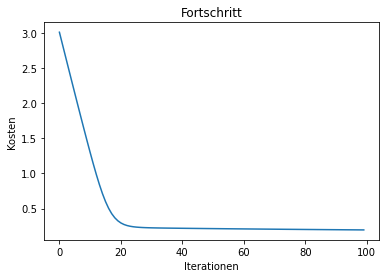

In [132]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

# Decision Boundary

In [199]:
def evaluation_plt(x, y, final_theta):
    y = np.array([0.5]*len(y))
    plt.plot(y, "b-")
    plt.plot(logistic_hypothesis(final_theta)(helper(x)), "rx")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

[0.99999586 0.99999435 0.99999292 ... 0.97294176 0.86613729 0.99760244]


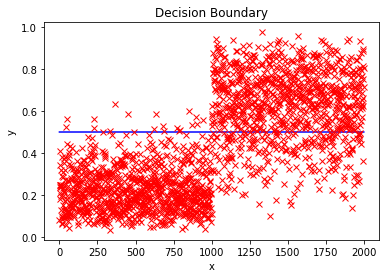

In [200]:
evaluation_plt(X, y, history_theta[-1])

#### Accuracy

The logistic hypothesis outputs a value in the interval $]0,1[$. We want to map this value to one specific class i.e. $0$ or $1$, so we apply a threshold known as the decision boundary: If the predicted value is < 0.5, the class is 0, otherwise it is 1.

**Task:**

1. Calculate the accuracy of your final classifier. The accuracy is the proportion of the correctly classified data.
2. Why will the accuracy never reach 100% using this model and this data set?

In [220]:
#1
def accuracy(x, y, final_theta):
    final = logistic_hypothesis(final_theta)(helper(x))
    class1 = []
    class2 = []
    for i in final:
        if i < 0.5:
            class1.append(i)
        else:
            class2.append(i)
    return "accuracy is: " + str(len(class2)/10) + "%"
#2
#

In [221]:
print(accuracy(X, y, history_theta[-1]))

accuracy is: 79.1%
